In [1]:
import pandas as pd

df = pd.read_csv('아파트(매매)__실거래가_20220809220723.csv', encoding='cp949')
#df.지역
df_city_num=df.지역.str.extract(r'([가-힣]+)').value_counts()

df_city=df.지역.str.extract(r'([가-힣]+)')
df['도시']=df_city


#df.info()

Text(0.5, 1.0, '전국 지역별 부동산 거래량')

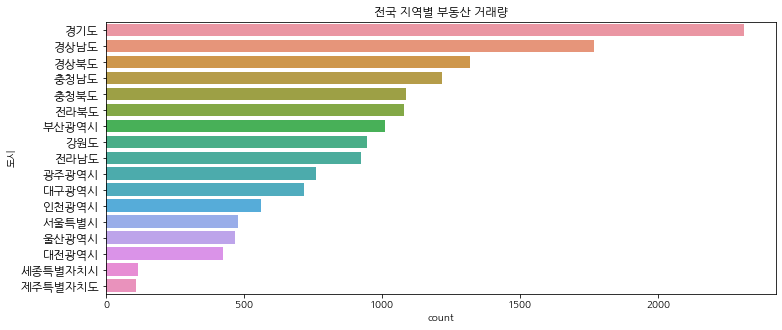

In [2]:
#전국 거래량 차트
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 5))
sns.countplot(y=df['도시'], order=df['도시'].value_counts().index)
plt.yticks(fontsize=12)
plt.title('전국 지역별 부동산 거래량')
#plt.show()

Text(0.5, 1.0, '대구 동네별 부동산 거래량')

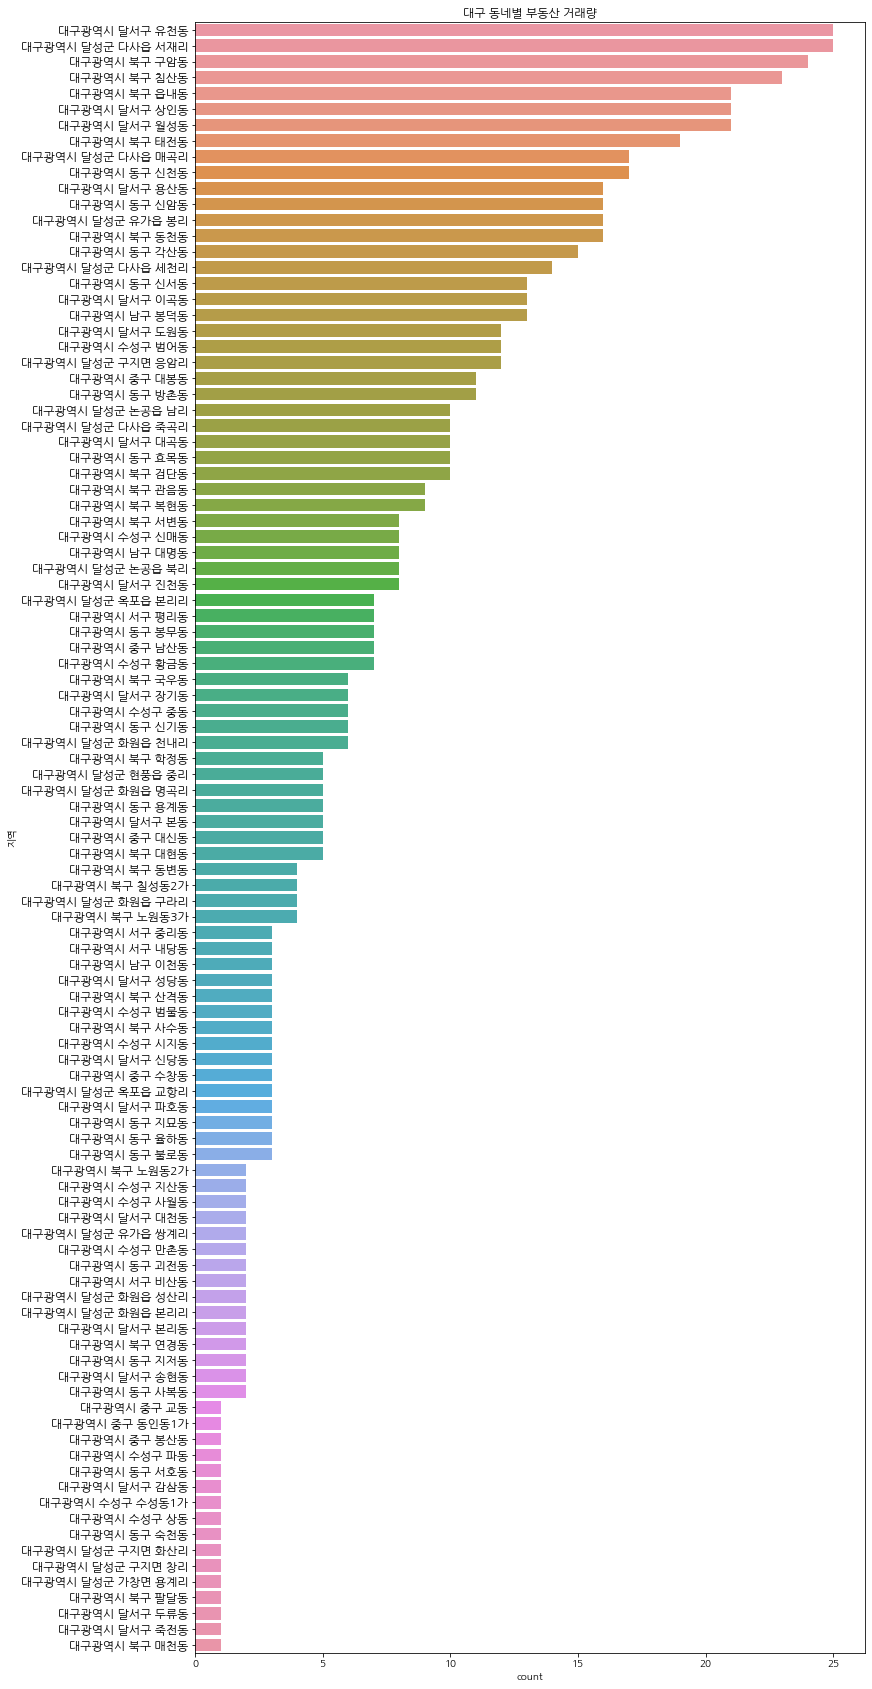

In [3]:
# 대구시 동별 거래량 차트
df_daegu=df[df.지역.str.find('대구광역시')>-1]

plt.figure(figsize=(12, 30))
sns.countplot(y=df_daegu['지역'], order=df_daegu['지역'].value_counts().index)
plt.yticks(fontsize=12)
plt.title('대구 동네별 부동산 거래량')
#plt.show()

Text(0.5, 1.0, '대구 구별 부동산 거래량')

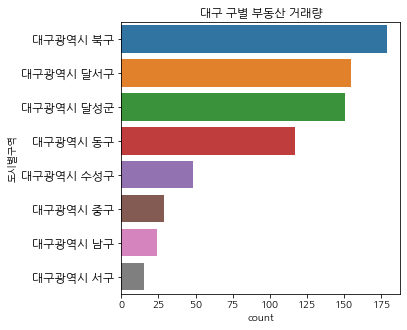

In [4]:
#대구광역시 구별 거래량
df['도시별구역']=df.지역.str.extract(r'([가-힣]+[ ][가-힣]+)')

gu_daegu=df[df.도시별구역.str.find('대구광역시')>-1]

plt.figure(figsize=(5, 5))
sns.countplot(y=gu_daegu['도시별구역'], order=gu_daegu['도시별구역'].value_counts().index)
plt.yticks(fontsize=12)
plt.title('대구 구별 부동산 거래량')
#plt.show()

In [5]:
# 대구시 구별 거래량 DB
dg_data=pd.DataFrame(index=gu_daegu['도시별구역'])
dg_da=dg_data.groupby(['도시별구역']).mean()
dg_da['구별거래량']=gu_daegu['도시별구역'].value_counts()
dg_da

,구별거래량
도시별구역,
대구광역시 남구,24
대구광역시 달서구,155
대구광역시 달성군,151
대구광역시 동구,117
대구광역시 북구,179
대구광역시 서구,15
대구광역시 수성구,48
대구광역시 중구,29


<Figure size 1440x216 with 0 Axes>

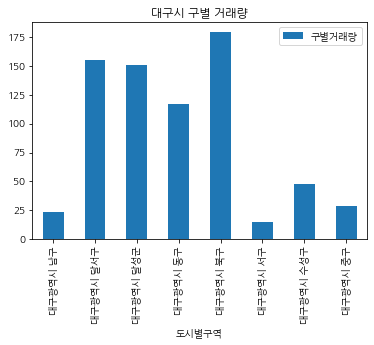

In [6]:
#구별 거래량 바차트
import matplotlib.pyplot as plt
plt.figure(figsize=(20,3))
dg_da.plot(kind=('bar'))
plt.title('대구시 구별 거래량')
plt.show()

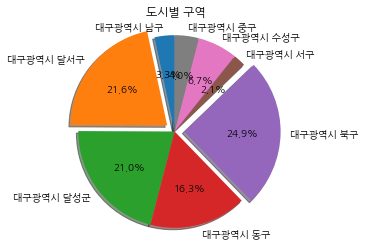

In [7]:
# 구별 거래량 파이차트
labels = dg_da.index
group_sizes = dg_da['구별거래량']

explode = (0,0.1,0,0,0.1,0,0,0)
plt.title("도시별 구역")
plt.pie(group_sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()